<a href="https://colab.research.google.com/github/ZahraDehghani99/AI-Internship/blob/master/HW4/%20document_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work4 - Document Categorization using LSI

## Read data and Data preprocessing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


در هنگام خواندن این دیتاست به خطا می خوریم که در بعضی از سطرها تعداد ستون ها فرق دارد. تعداد ستون در اکثر سطرها یکی است اما در برخی از سطر ها به دلیل نامرتب بودن متن و استفاده از علامت کاما متن ها در چند ستون قرار گرفته اند. یک کار ممکن این است تا ماکسیمم تعداد ستون ها را بدست آوریم و تعداد ستون را برای همگی به همان تعداد در نظر بگیریم. ما در اینجا برای مثال این تعداد را ۸ انتخاب کردیم .اما ستون های اضافه ای که هستند شامل اطلاعات اضافه تری نیستند و همان ادامه ی متن هستند. که ما از آن ها ضرف نظر می کنیم.


 [لینک](https://sourceforge.net/projects/persica/) داداگان

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/HW4/persica.csv', header = None,names=range(8))
df.head()

,0,1,2,3,4,5,6,7
0,843656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,وزير علوم درجمع استادان نمونه: سن بازنشستگي اس...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,138/5//09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0:9::18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


حال ستون های خالی را با صفر پر می کنیم.

In [ ]:
new_df = df.fillna(0)

In [ ]:
new_df.head(30)

,0,1,2,3,4,5,6,7
0,843656,0,0,0,0,0,0,0
1,وزير علوم درجمع استادان نمونه: سن بازنشستگي اس...,0,0,0,0,0,0,0
2,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,0,0,0,0,0,0,0
3,138/5//09,0,0,0,0,0,0,0
4,0:9::18,0,0,0,0,0,0,0
5,آموزشي-,0,0,0,0,0,0,0
6,آموزشي,0,0,0,0,0,0,0
7,837144,0,0,0,0,0,0,0
8,گردهمايي دانش‌آموختگان موسسه آموزش عالي سوره ب...,0,0,0,0,0,0,0
9,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,0,0,0,0,0,0,0


In [ ]:
new_df.shape

(76993, 8)

In [ ]:
with open('/content/drive/MyDrive/NLP/HW4/persica.csv', 'r') as f:
  x = f.readlines()

In [ ]:
len(x)

76993

In [ ]:
x[1080]

'ويژه نامه فرهنگي و ديني سيره عملي و نظري با هدف گرامي داشت ايام سوگواري ابا عبدالله الحسين، امروز در دانشگاه تربيت معلم منتشر شد. به گزارش خبرگزاري دانشجويان ايران (ايسنا)، ويژه نامه فرهنگي و ديني سيره نظري و عملي با هدف تبيين، تبليغ و ترويج سيره نظري و عملي سالار شهيدان، آشنايي دانشجويان با فرهنگ عاشورا و معرفي مولفه و شاخصه\u200cهاي مكتب امام حسين (ع) از سوي روابط عمومي و اداره فعاليت\u200cهاي فوق برنامه جهاد دانشگاهي واحد تربيت معلم در اولين روز دهه اول ماه محرم در دانشگاه تربيت معلم منتشر شد. اين گزارش مي\u200cافزايد: نشانه\u200cهاي مومنان، پرهيز از ستمكاري، فلسفه قيام در مقابل ظلم، ملاكهاي رستگاري، نگاه به دنيا و مقوله مرگ، انواع مرگ، آثار معصيت الهي، اقسان عبادات، دنيا و اهل دنيا، اصلاحات،\u200cامر به معروف و نهي از منكر، اقسام جهاد،\u200cعناوين سخنان نوراني امام حسين (ع) است كه جهاد دانشگاهي واحد تربيت معلم در اولين روز دهه اول محرم امسال منتشر مي\u200cكند. برگزاري دوره\u200cهاي كارگاهي تجارت الكترونيك دوره\u200cهاي كارگاهي تجارت الكترونيك از سوي معاونت آموزشي جهاد دانشگاهي واح

In [ ]:
y = x[1080].split(",")
len(y)

8

In [ ]:
y

['ويژه نامه فرهنگي و ديني سيره عملي و نظري با هدف گرامي داشت ايام سوگواري ابا عبدالله الحسين، امروز در دانشگاه تربيت معلم منتشر شد. به گزارش خبرگزاري دانشجويان ايران (ايسنا)، ويژه نامه فرهنگي و ديني سيره نظري و عملي با هدف تبيين، تبليغ و ترويج سيره نظري و عملي سالار شهيدان، آشنايي دانشجويان با فرهنگ عاشورا و معرفي مولفه و شاخصه\u200cهاي مكتب امام حسين (ع) از سوي روابط عمومي و اداره فعاليت\u200cهاي فوق برنامه جهاد دانشگاهي واحد تربيت معلم در اولين روز دهه اول ماه محرم در دانشگاه تربيت معلم منتشر شد. اين گزارش مي\u200cافزايد: نشانه\u200cهاي مومنان، پرهيز از ستمكاري، فلسفه قيام در مقابل ظلم، ملاكهاي رستگاري، نگاه به دنيا و مقوله مرگ، انواع مرگ، آثار معصيت الهي، اقسان عبادات، دنيا و اهل دنيا، اصلاحات،\u200cامر به معروف و نهي از منكر، اقسام جهاد،\u200cعناوين سخنان نوراني امام حسين (ع) است كه جهاد دانشگاهي واحد تربيت معلم در اولين روز دهه اول محرم امسال منتشر مي\u200cكند. برگزاري دوره\u200cهاي كارگاهي تجارت الكترونيك دوره\u200cهاي كارگاهي تجارت الكترونيك از سوي معاونت آموزشي جهاد دانشگاهي وا

با این قطعه کد ماکسیمم تعداد ستون بدست می آید و سطر هایی که بیشتر از یک ستون دارند را استخراج می کنیم.


In [ ]:
l =1
idx = []
for i in range(len(x)):
  y = x[i].split(",")
  if len(y) > l:
    l = len(y)
    idx.append(i)


ماکسیمم تعداد ستون

In [ ]:
l

41

سطرهایی که بیشتر از یک ستون دارند.

In [ ]:
idx

[0, 1080, 32853, 38340, 41798]

In [ ]:
x[41798]

'كمال خرازي در مراسم انتقال قدرت در كابل خطاب به دولتمردان جديد افغانستان: ,,,,,,,,,,,,,,,,,,,,,,,  ايران از حمايت شما دريغ نخواهد كرد  ,,,,,,,,,,,,,,,,,\n'

In [ ]:
new_df.iloc[41798][0]

'كمال خرازي در مراسم انتقال قدرت در كابل خطاب به دولتمردان جديد افغانستان: '

In [ ]:
x[38340]

'در همايش دانشجويي حمايت از انتفاضه\u200cي مردم فلسطين دانشگاه امام صادق عنوان شد : ,,,,,,,,,,,,,, دشمن اصلي مردم فلسطين آمريكا است ,,,,,,,,,,,,,,,,,\n'

In [ ]:
x[32853]

'دكترصادق طباطبايي در آستانه\u200cي بيست\u200cوهشتمين سالگرد ربوده شدن امام موسي صدر در گفت\u200cوگو با خبرنگار سرويس تاريخ خبرگزاري دانشجويان ايران (ايسنا)، با جملات فوق سخنان خود را آغاز كرد و افزود:« درباره\u200cي امام صدر مطالب زيادي گفته شده و باز هم گفته خواهد شد و هرسال هم باز با نزديك شدن به سالروز اختفاي ايشان مطالبي شنيده و گفته مي\u200cشود.اما امسال به دليل پيروزي جانانه\u200cي مقاومت اسلامي در لبنان در مقابل رژيم تا دندان مسلح و با تجهيزات كامل و فوق مدرن اسراييلي\u200cها در يك شرايط ديگري نسبت به سالهاي گذشته به سر مي\u200cبريم. پيروزي مقاومت لبنان بر ارتش اسراييل فصل جديدي را در تاريخ روابط سياسي منطقه باز كرده است.» خواهر زاده\u200cي امام موسي صدر كه دهه 50 تا 70 ميلادي را دهه هاي \u200c آرمانگرايي مي ناميد در توصيف فضاي فكري آن دوران اظهار داشت:«در دهه هاي سي و چهل شمسي، جهان ،جهان آرمانگرايي بود. ؛ در جهان اسلام ودرکشوري مثل لبنان دوران دوران آرمان گرايي است. انديشه مارکسيسم و ماترياليسم ديالکتيک بر جهان، سيطره فکري و سياسي و داعيه علمي بودن ومبارزه دارد. فضاي حاکم بر 

In [ ]:
x[0]

'\ufeff843656,\n'

اما ما این سطرها را درست نکردیم.


- [ ]  درست کردن سطرهای خراب 

سپس در داده ی مرتب شده اطلاعات ستون ها را در لیست مربوط به خودش قرار می دهیم تا یک دیتافریم جدید که شامل ۷ ستون است را تشکیل دهیم.

In [ ]:
new_id, title, body, date, time, category, category2 = [], [], [], [], [], [], []
for i in range(new_df.shape[0]):
  if i%7==0:
    new_id.append(new_df.iloc[i][0])
  elif i%7 == 1:
    title.append(new_df.iloc[i][0])  
  elif i%7 == 2:
    body.append(new_df.iloc[i][0])  
  elif i%7 == 3:
    date.append(new_df.iloc[i][0])     
  elif i%7 == 4:
    time.append(new_df.iloc[i][0])  
  elif i%7 == 5:
    category.append(new_df.iloc[i][0])      
  elif i%7 == 6:
    category2.append(new_df.iloc[i][0])        

In [ ]:
len(category)

10999

In [ ]:
data = {'NewID': new_id, 'Title': title, 'Body':body, 'Date':date, 'Time':time, 'Category':category, 'Category2':category2}
df = pd.DataFrame(data)

In [ ]:
df.shape

(10999, 7)

In [ ]:
df.head()

,NewID,Title,Body,Date,Time,Category,Category2
0,843656,وزير علوم درجمع استادان نمونه: سن بازنشستگي اس...,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,138/5//09,0:9::18,آموزشي-,آموزشي
1,837144,گردهمايي دانش‌آموختگان موسسه آموزش عالي سوره ب...,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,138/5//09,1:4::11,آموزشي-,آموزشي
2,436862,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ا...,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,138/3//07,1:0::03,آموزشي-,آموزشي
3,227781,همايش يكروزه آسيب شناسي مفهوم روابط عمومي در ب...,0,138/2//02,1:3::42,اجتماعي-خانواده-,اجتماعي
4,174187,وضعيت اقتصادي و ميزان تحصيلات والدين از مهمتري...,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,138/1//08,1:1::49,آموزشي-,آموزشي


In [ ]:
# df.to_csv('/content/drive/MyDrive/NLP/HW4/persica_edited.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/HW4/persica_edited.csv')
df.head()

,NewID,Title,Body,Date,Time,Category,Category2
0,843656,وزير علوم درجمع استادان نمونه: سن بازنشستگي اس...,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,138/5//09,0:9::18,آموزشي-,آموزشي
1,837144,گردهمايي دانش‌آموختگان موسسه آموزش عالي سوره ب...,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,138/5//09,1:4::11,آموزشي-,آموزشي
2,436862,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ا...,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,138/3//07,1:0::03,آموزشي-,آموزشي
3,227781,همايش يكروزه آسيب شناسي مفهوم روابط عمومي در ب...,0,138/2//02,1:3::42,اجتماعي-خانواده-,اجتماعي
4,174187,وضعيت اقتصادي و ميزان تحصيلات والدين از مهمتري...,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,138/1//08,1:1::49,آموزشي-,آموزشي


In [ ]:
df.Category2.value_counts()

آموزشي        1000
اجتماعي       1000
اقتصادي       1000
بهداشتي       1000
علمي          1000
سياسي         1000
فرهنگي        1000
فقه و حقوق    1000
مذهبي         1000
ورزشي         1000
تاريخي         999
Name: Category2, dtype: int64

In [ ]:
df.shape

(10999, 7)

چون متن موجود در قسمت بدنه اخبار از کلمات بیشتری تشکیل شده است ما از آن برای کلاس بندی اخبار استفاده می کنیم بنابراین به دنبال این هستیم تا سطرهایی که این ستون را خالی دارند را حذف کنیم.

In [ ]:
df = df.loc[df['Body'] != '0']

In [ ]:
df = df.drop(columns=['Date', 'Time', 'Category', 'NewID', 'Title'])

In [ ]:
df.shape

(10988, 2)

In [3]:
# df.to_csv('/content/drive/MyDrive/NLP/HW4/persica_final_edit.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/NLP/HW4/persica_final_edit.csv')

In [4]:
df.head()

,Body,Category2
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...,آموزشي
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...,آموزشي
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...,آموزشي
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...,آموزشي


In [5]:
print(f'df shape : {df.shape}')

df shape : (10988, 2)


## Split X and y

In [5]:
X = df.drop(columns='Category2')
y = pd.DataFrame(df['Category2'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (10988, 1)
y shape : (10988, 1)


In [6]:
X.head()

,Body
0,وزير علوم در جمع استادان نمونه كشور گفت: از اس...
1,به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ...
2,نتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و ك...
3,محمدتقي علوي يزدي، مجري اين طرح پژوهشي در اين‌...
4,دوره آموزشي سيره نبوي بعنوان يكي از رشته‌هاي ج...


In [7]:
y.value_counts()

Category2 
آموزشي        1000
اقتصادي       1000
بهداشتي       1000
مذهبي         1000
اجتماعي        999
فرهنگي         999
ورزشي          999
تاريخي         998
سياسي          998
فقه و حقوق     998
علمي           997
dtype: int64

Let's show the distribution of data in each class.

In [8]:
!pip install -q python-bidi
!pip install -q arabic-reshaper

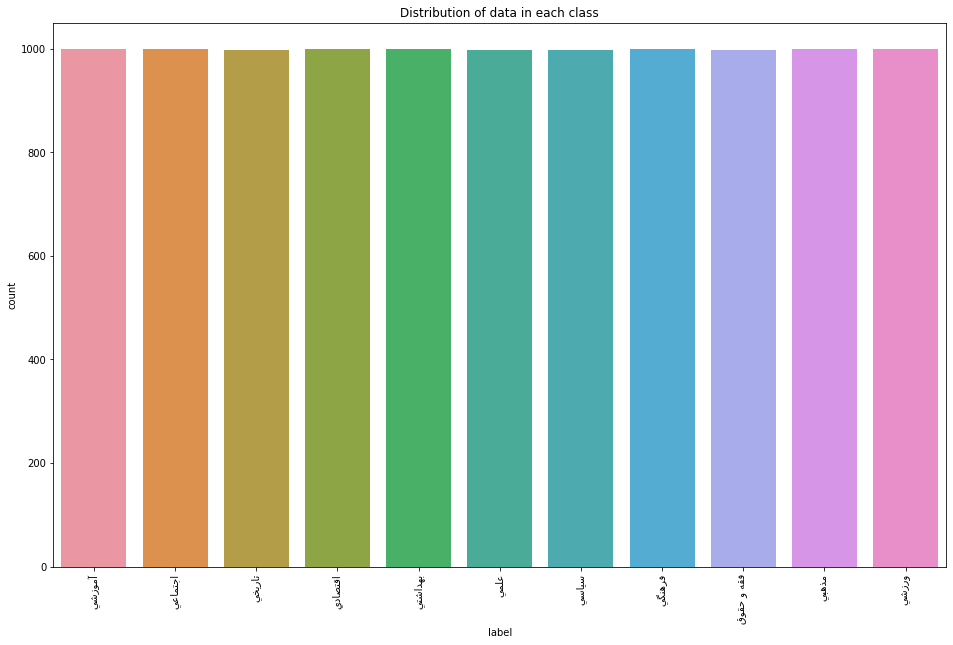

In [ ]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

classes = [get_display(reshape(label)) for label in y.Category2]
y_fa = pd.DataFrame(classes)
y_fa.columns = ['label']


fig = plt.figure(figsize=(16,10))
sns.countplot(x="label", data=y_fa)
plt.title("Distribution of data in each class")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=15)
plt.show()

## Train test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8790, 1)
X_test shape: (2198, 1)
y_train shape: (8790, 1)
y_test shape: (2198, 1)


## Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [11]:
inv =  le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
classes = []
for i in range(len(inv)):
  classes.append(inv[i])
  print(f'{inv[i]} => {i}')

آموزشي => 0
اجتماعي => 1
اقتصادي => 2
بهداشتي => 3
تاريخي => 4
سياسي => 5
علمي => 6
فرهنگي => 7
فقه و حقوق => 8
مذهبي => 9
ورزشي => 10


## Create term document matrix

consider stopwords and vocabulary like tfidf

In [12]:
def readFile(filename):
  fileObj = open(filename, 'r', encoding ='utf-8') # open the file in read mode
  words = fileObj.read().splitlines() # puts the file into an array
  fileObj.close()
  return words

In [13]:
stopwords = readFile('/content/drive/MyDrive/AI-Internship/persian_stopwords_kharazi.txt')

In [ ]:
print(f'10 first stop words : {stopwords[:10]}')

10 first stop words : ['!', '"', '#', '(', ')', '*', ',', '-', '.', '/']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stopwords, min_df=10) # change min_dif
X_train_bow = cv.fit_transform(X_train['Body'])
X_test_bow = cv.transform(X_test['Body'])

In [16]:
print(f'X_train_bow : {X_train_bow.shape} and X_test_bow : {X_test_bow.shape}')

X_train_bow : (8790, 11284) and X_test_bow : (2198, 11284)


In [ ]:
type(X_train_bow)

scipy.sparse.csr.csr_matrix

In [17]:
bow = pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names())
bow.head()

,10,100,1000,102,103,105,106,107,108,109,...,گيرنده,گيرندگان,گيري,گيريم,گيريها,گيريهاي,گيلان,گيلاني,گچ,گچساران
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
bow.columns[0]

'10'

## Dimetionality reduction using LSA

In [19]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components= 400, random_state=42)
tsvd_train = tsvd.fit_transform(X_train_bow)
tsvd_test = tsvd.transform(X_test_bow)

In [20]:
print(f'truncated SVD of X_train shape : {tsvd_train.shape} and truncated SVD of X_test shape : {tsvd_test.shape}')

truncated SVD of X_train shape : (8790, 400) and truncated SVD of X_test shape : (2198, 400)


In [ ]:
print(f'type of truncated svd : {type(tsvd_train)}')

type of truncated svd : <class 'numpy.ndarray'>


In [23]:
print(f'sum of explained variance ratio of truncated svd : {tsvd.explained_variance_ratio_.sum()}')

sum of explained variance ratio of truncated svd : 0.8743205342647575


In [22]:
# np.save('/content/drive/MyDrive/NLP/HW4/tsvd_train_200.npy', tsvd_train)
# np.save('/content/drive/MyDrive/NLP/HW4/tsvd_test_200.npy', tsvd_test)
np.save('/content/drive/MyDrive/NLP/HW4/tsvd_train_400.npy', tsvd_train)
np.save('/content/drive/MyDrive/NLP/HW4/tsvd_test_400.npy', tsvd_test)

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(tsvd_train)
X_test = scaler.transform(tsvd_test)

## GradientBoostingClassifier


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
print(f'Accuracy score (training) : {clf.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf.score(X_test, y_test)}')

Accuracy score (training) : 0.941296928327645
Accuracy score (training) : 0.7224749772520473


In [42]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       200
           1       0.46      0.46      0.46       200
           2       0.72      0.64      0.67       200
           3       0.85      0.79      0.82       200
           4       0.81      0.77      0.79       199
           5       0.59      0.59      0.59       200
           6       0.62      0.61      0.61       199
           7       0.69      0.72      0.71       200
           8       0.74      0.75      0.75       200
           9       0.84      0.82      0.83       200
          10       0.87      0.92      0.90       200

    accuracy                           0.72      2198
   macro avg       0.72      0.72      0.72      2198
weighted avg       0.72      0.72      0.72      2198



In [28]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

def confusion_matrix(y_test, y_pred):
  labels = [i for i in range(len(list(set(y_test))))]
  df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = labels,
                columns = labels)
  plt.figure(figsize=(16,10))
  ax= plt.subplot()
  sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g', ax=ax)
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  class_names= classes
  # set persian names in correct way
  class_names = [get_display(reshape(label)) for label in class_names]
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()
  plt.show()

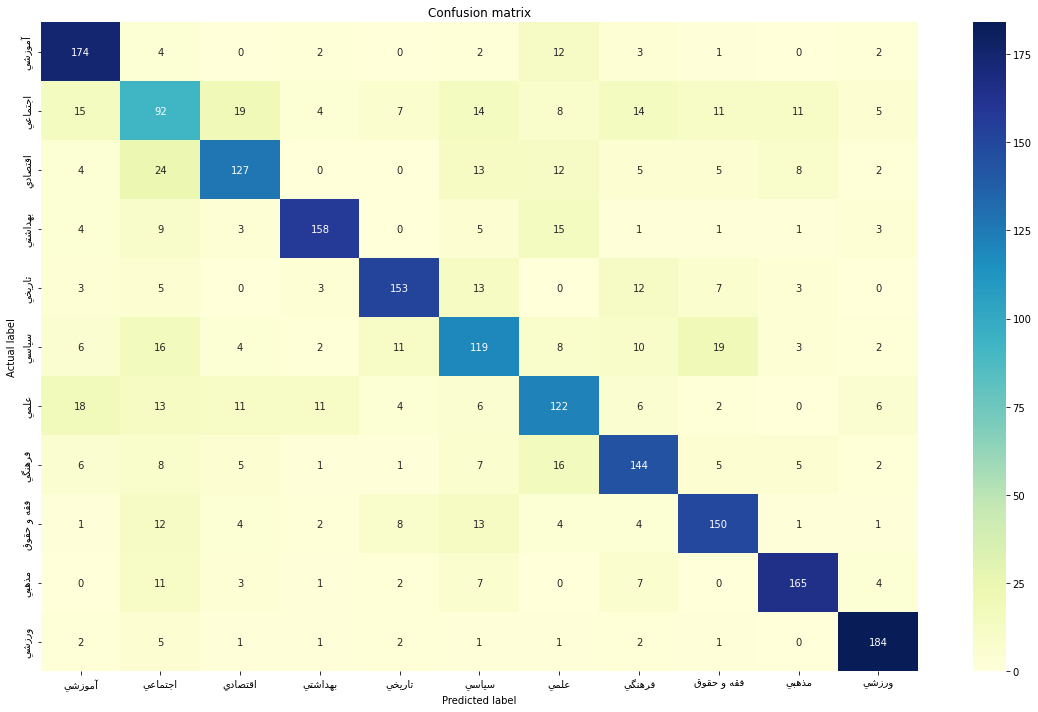

In [43]:
confusion_matrix(y_test, y_pred_test)

## SVM

In [36]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
clf_svc.fit(X_train, y_train)

SVC(random_state=42)

In [37]:
print(f'Accuracy score (training) : {clf_svc.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_svc.score(X_test, y_test)}')

Accuracy score (training) : 0.7733788395904437
Accuracy score (training) : 0.6933575978161965


In [38]:
y_pred_test = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       200
           1       0.36      0.67      0.47       200
           2       0.83      0.58      0.68       200
           3       0.89      0.72      0.80       200
           4       0.77      0.64      0.70       199
           5       0.55      0.64      0.59       200
           6       0.67      0.67      0.67       199
           7       0.68      0.69      0.69       200
           8       0.78      0.62      0.69       200
           9       0.80      0.76      0.78       200
          10       0.90      0.84      0.87       200

    accuracy                           0.69      2198
   macro avg       0.73      0.69      0.70      2198
weighted avg       0.73      0.69      0.70      2198



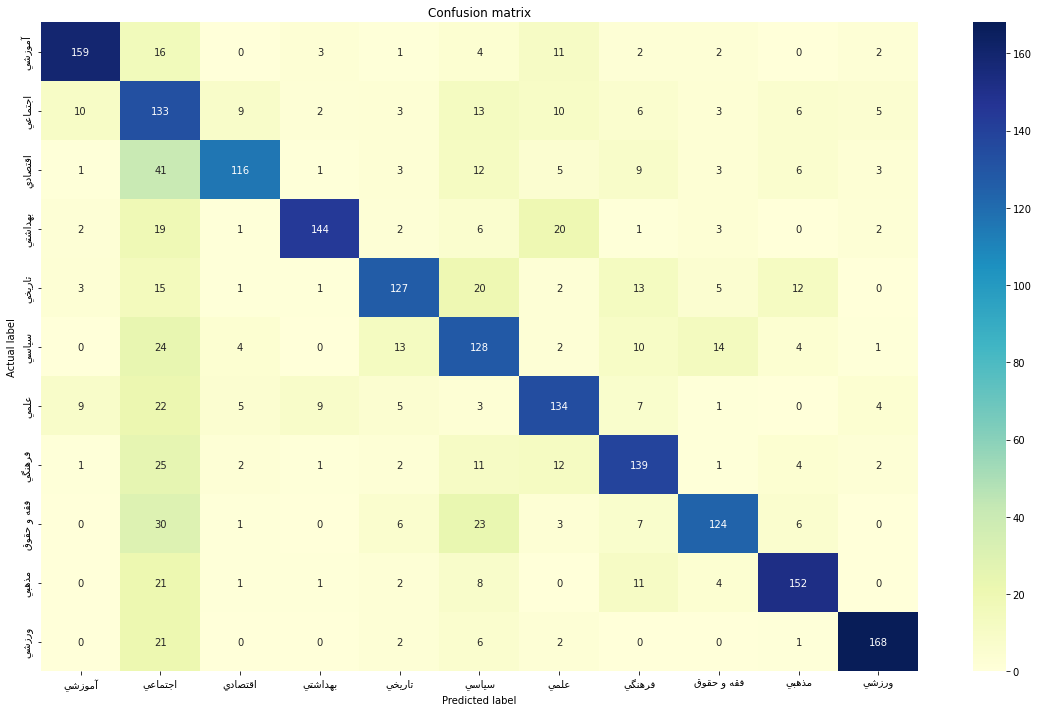

In [39]:
confusion_matrix(y_test, y_pred_test)

## Naive Bayes Classifier


ValueError: Negative values in data passed to MultinomialNB (input X)

مقادیر منفی قبول نمی کنه پس نرمال سازی را انجام میدهم و بعدش می دهم بهش

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
print(f'Accuracy score (training) : {clf_mnb.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_mnb.score(X_test, y_test)}')

Accuracy score (training) : 0.5390216154721275
Accuracy score (training) : 0.5159235668789809


In [ ]:
y_pred_test = clf_mnb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       200
           1       0.22      0.64      0.33       200
           2       0.66      0.55      0.60       200
           3       0.84      0.62      0.72       200
           4       0.54      0.56      0.55       199
           5       0.51      0.24      0.33       200
           6       0.64      0.32      0.42       199
           7       0.74      0.28      0.40       200
           8       0.33      0.24      0.28       200
           9       0.66      0.73      0.70       200
          10       0.55      0.74      0.63       200

    accuracy                           0.52      2198
   macro avg       0.59      0.52      0.52      2198
weighted avg       0.59      0.52      0.52      2198



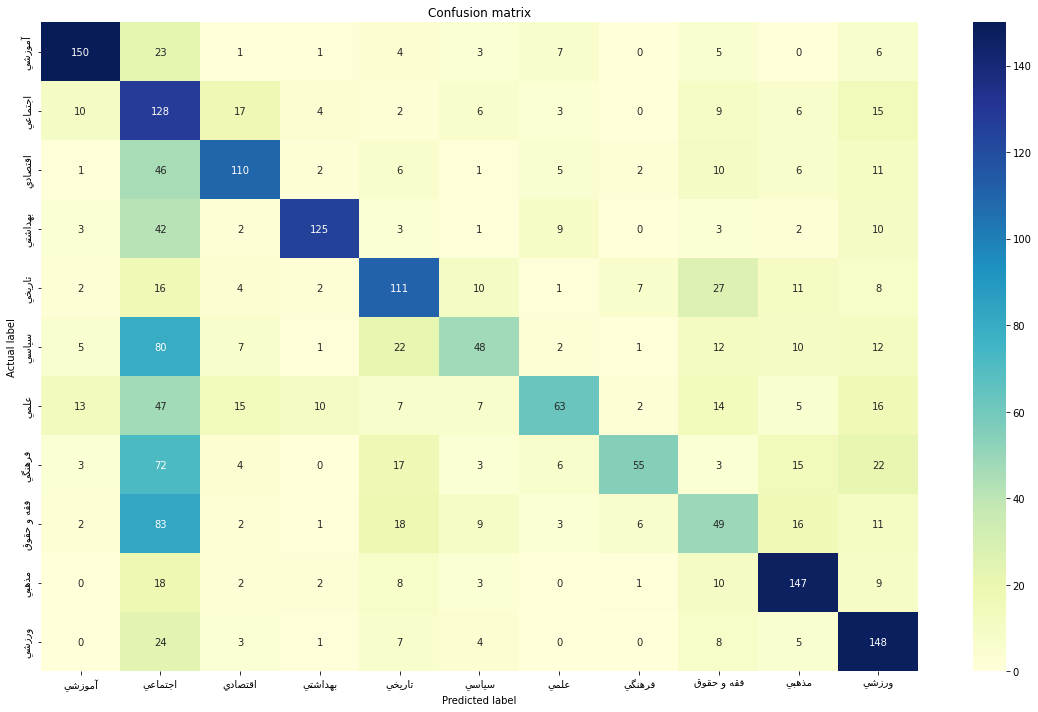

In [ ]:
confusion_matrix(y_test, y_pred_test)

## K nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print(f'Accuracy score (training) : {clf_knn.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_knn.score(X_test, y_test)}')

Accuracy score (training) : 0.6739476678043231
Accuracy score (training) : 0.5077343039126478


In [ ]:
y_pred_test = clf_knn.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       200
           1       0.30      0.34      0.32       200
           2       0.62      0.45      0.52       200
           3       0.72      0.57      0.64       200
           4       0.50      0.36      0.42       199
           5       0.43      0.43      0.43       200
           6       0.45      0.47      0.46       199
           7       0.50      0.56      0.53       200
           8       0.69      0.36      0.48       200
           9       0.69      0.58      0.63       200
          10       0.42      0.89      0.57       200

    accuracy                           0.51      2198
   macro avg       0.54      0.51      0.51      2198
weighted avg       0.54      0.51      0.51      2198



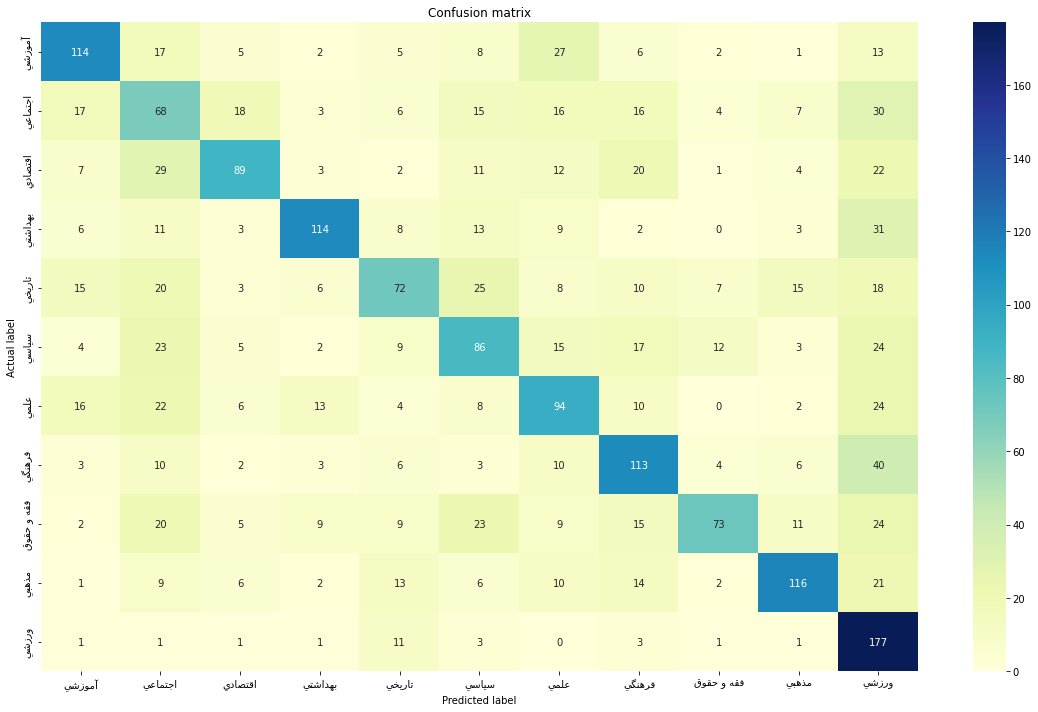

In [ ]:
confusion_matrix(y_test, y_pred_test)

## XGBoost

In [30]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective='multi:softmax',n_estimators=200, num_classes=11, random_state=42)
clf_xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=200, num_classes=11, objective='multi:softprob',
              random_state=42)

In [31]:
print(f'Accuracy score (training) : {clf_xgb.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_xgb.score(X_test, y_test)}')

Accuracy score (training) : 0.9629124004550625
Accuracy score (training) : 0.7484076433121019


In [32]:
y_pred_test = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       200
           1       0.47      0.49      0.48       200
           2       0.74      0.70      0.72       200
           3       0.85      0.81      0.83       200
           4       0.86      0.81      0.83       199
           5       0.67      0.64      0.65       200
           6       0.65      0.64      0.64       199
           7       0.70      0.72      0.71       200
           8       0.78      0.80      0.79       200
           9       0.86      0.83      0.85       200
          10       0.88      0.93      0.90       200

    accuracy                           0.75      2198
   macro avg       0.75      0.75      0.75      2198
weighted avg       0.75      0.75      0.75      2198



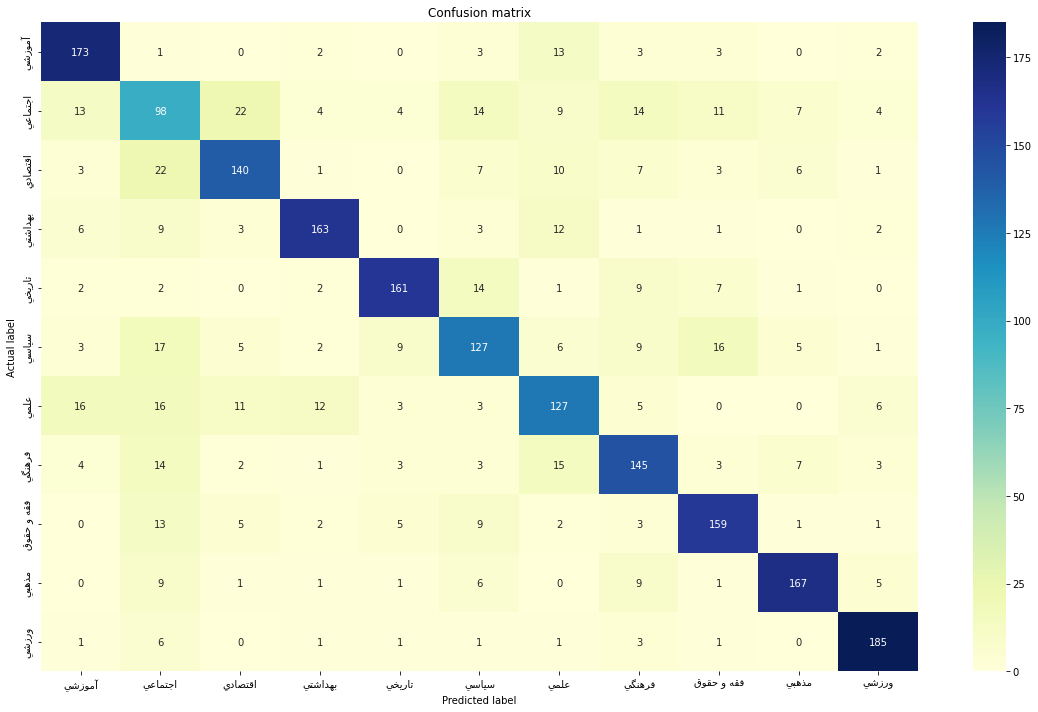

In [35]:
confusion_matrix(y_test, y_pred_test)

## Create term document matiix using tf-idf

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words=stopwords, min_df=10)
X_train_tfidf = tf.fit_transform(X_train['Body'])
X_test_tfidf = tf.transform(X_test['Body'])

print(f'X_train_tfidf shape : {X_train_tfidf.shape}')
print(f'X_test_tfidf shape : {X_test_tfidf.shape}')

X_train_tfidf shape : (8790, 11284)
X_test_tfidf shape : (2198, 11284)


In [16]:
tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tf.get_feature_names())
tfidf.head()

,10,100,1000,102,103,105,106,107,108,109,...,گيرنده,گيرندگان,گيري,گيريم,گيريها,گيريهاي,گيلان,گيلاني,گچ,گچساران
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037925,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.059844,0.077158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.074650,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
tfidf.columns[0]

'10'

## Dimetionality reduction using LSA

In [26]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components= 400, random_state=42)
tsvd_train = tsvd.fit_transform(X_train_tfidf)
tsvd_test = tsvd.transform(X_test_tfidf)

In [27]:
print(f'truncated SVD of X_train shape : {tsvd_train.shape} and truncated SVD of X_test shape : {tsvd_test.shape}')

truncated SVD of X_train shape : (8790, 400) and truncated SVD of X_test shape : (2198, 400)


In [28]:
print(f'type of truncated svd : {type(tsvd_train)}')

type of truncated svd : <class 'numpy.ndarray'>


In [29]:
print(f'sum of explained variance ratio of truncated svd : {tsvd.explained_variance_ratio_.sum()}')

sum of explained variance ratio of truncated svd : 0.421340999445321


In [30]:
# np.save('/content/drive/MyDrive/NLP/HW4/tsvd_train_200.npy', tsvd_train)
# np.save('/content/drive/MyDrive/NLP/HW4/tsvd_test_200.npy', tsvd_test)
np.save('/content/drive/MyDrive/NLP/HW4/tsvd_train_400_tfidf.npy', tsvd_train)
np.save('/content/drive/MyDrive/NLP/HW4/tsvd_test_400_tfidf.npy', tsvd_test)

## Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(tsvd_train)
X_test = scaler.transform(tsvd_test)

## GradientBoostingClassifier


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
print(f'Accuracy score (training) : {clf.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf.score(X_test, y_test)}')

Accuracy score (training) : 0.926052332195677
Accuracy score (training) : 0.7616014558689718


In [34]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       200
           1       0.51      0.49      0.50       200
           2       0.72      0.72      0.72       200
           3       0.85      0.79      0.82       200
           4       0.87      0.81      0.84       199
           5       0.70      0.66      0.68       200
           6       0.64      0.68      0.66       199
           7       0.71      0.75      0.73       200
           8       0.82      0.81      0.81       200
           9       0.91      0.86      0.88       200
          10       0.91      0.95      0.93       200

    accuracy                           0.76      2198
   macro avg       0.76      0.76      0.76      2198
weighted avg       0.76      0.76      0.76      2198



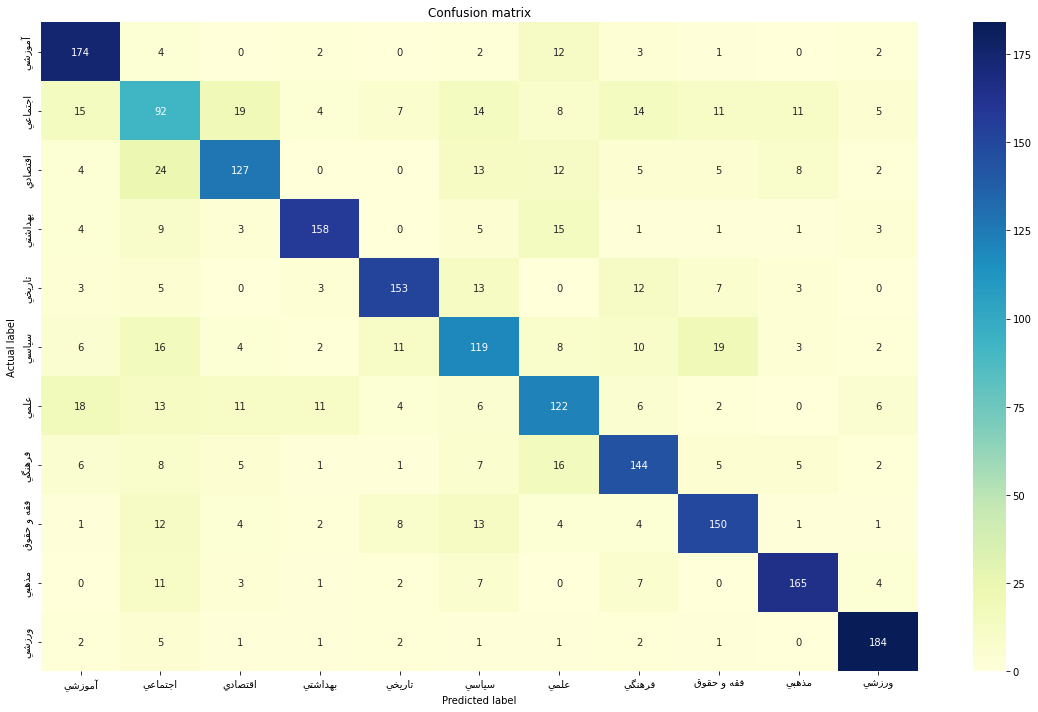

In [ ]:
confusion_matrix(y_test, y_pred_test)

## SVM

In [36]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
clf_svc.fit(X_train, y_train)

SVC(random_state=42)

In [37]:
print(f'Accuracy score (training) : {clf_svc.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_svc.score(X_test, y_test)}')

Accuracy score (training) : 0.951877133105802
Accuracy score (training) : 0.8280254777070064


In [38]:
y_pred_test = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       200
           1       0.58      0.61      0.60       200
           2       0.85      0.74      0.79       200
           3       0.88      0.91      0.90       200
           4       0.89      0.88      0.89       199
           5       0.77      0.72      0.75       200
           6       0.81      0.77      0.79       199
           7       0.72      0.84      0.78       200
           8       0.90      0.88      0.89       200
           9       0.92      0.89      0.90       200
          10       0.96      0.94      0.95       200

    accuracy                           0.83      2198
   macro avg       0.83      0.83      0.83      2198
weighted avg       0.83      0.83      0.83      2198



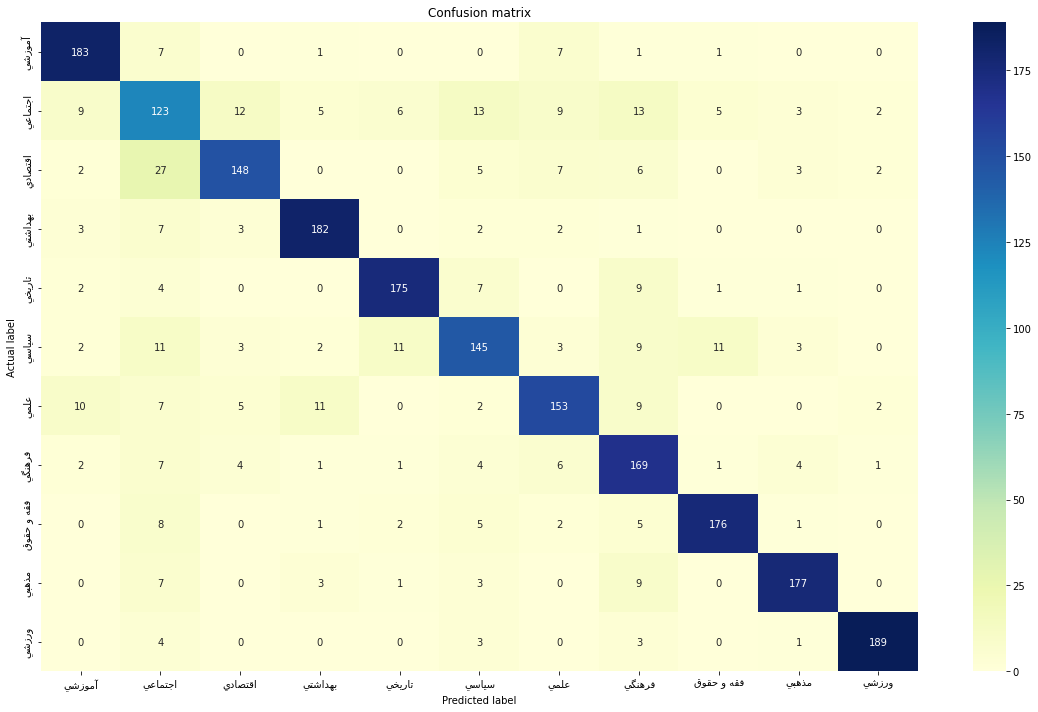

In [39]:
confusion_matrix(y_test, y_pred_test)

## XGBoost

In [40]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective='multi:softmax',n_estimators=200, num_classes=11, random_state=42)
clf_xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=200, num_classes=11, objective='multi:softprob',
              random_state=42)

In [41]:
print(f'Accuracy score (training) : {clf_xgb.score(X_train, y_train)}')
print(f'Accuracy score (training) : {clf_xgb.score(X_test, y_test)}')

Accuracy score (training) : 0.9713310580204778
Accuracy score (training) : 0.7797998180163785


In [42]:
y_pred_test = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       200
           1       0.54      0.52      0.53       200
           2       0.77      0.74      0.76       200
           3       0.85      0.84      0.85       200
           4       0.86      0.81      0.83       199
           5       0.73      0.67      0.70       200
           6       0.68      0.67      0.67       199
           7       0.72      0.79      0.75       200
           8       0.81      0.82      0.82       200
           9       0.93      0.89      0.91       200
          10       0.91      0.96      0.94       200

    accuracy                           0.78      2198
   macro avg       0.78      0.78      0.78      2198
weighted avg       0.78      0.78      0.78      2198



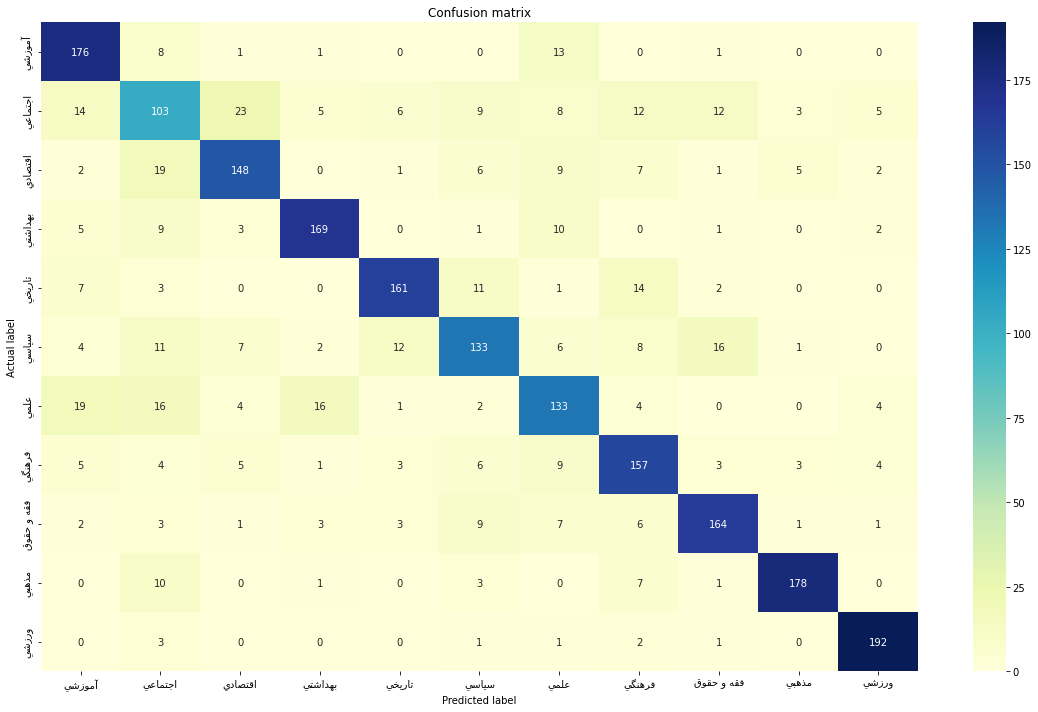

In [43]:
confusion_matrix(y_test, y_pred_test)